In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"Data-Collisions_FL3.csv")
df.head()


,Severity,RoadCond,Speeding
0,1.0,0,0
1,1.0,0,0
2,1.0,0,0
3,2.0,0,0
4,1.0,0,0


In [53]:
#Data Preprocessed to only include accident severity, road condition and whether passenger was speeding.
#Speeding: Y=1 N=0
#Road: Cond Dry=0 Wet=1 Ice/Snow/Oil=3
#Severity: 1: prop damange 2: Injury 3: Fatality 


In [4]:
print(df.dtypes)

Severity    float64
RoadCond      int64
Speeding      int64
dtype: object


In [5]:
#Find and remove missing values
df.dropna(inplace=True)


In [51]:
df['Severity'].value_counts()

1    149822
2     71875
Name: Severity, dtype: int64

In [52]:
df['Speeding'].value_counts()

0    211336
1     10361
Name: Speeding, dtype: int64

In [43]:
df.corr()

,Severity,RoadCond,Speeding
Severity,1.000000,-0.011822,0.019492
RoadCond,-0.011822,1.000000,0.149483
Speeding,0.019492,0.149483,1.000000


In [22]:
df = df[['Severity', 'RoadCond', 'Speeding']]
df['Severity'] = df['Severity'].astype('int')
df.head()

,Severity,RoadCond,Speeding
0,1,0,0
1,1,0,0
2,1,0,0
3,2,0,0
4,1,0,0


In [25]:
X= np.asarray(df[['RoadCond', 'Speeding']])
X[0:5]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])

In [26]:
y=np.asarray(df['Severity'])
y[0:5]

array([1, 1, 1, 2, 1])

In [27]:
#normalize dataset
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.77485045, -0.2214186 ],
       [-0.77485045, -0.2214186 ],
       [-0.77485045, -0.2214186 ],
       [-0.77485045, -0.2214186 ],
       [-0.77485045, -0.2214186 ]])

In [29]:
#split dataset into train/test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.4, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (133018, 2) (133018,)
Test set: (88679, 2) (88679,)


In [1]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

NameError: name 'X_train' is not defined

In [32]:
#now I can predict the model using the test set
yhat=LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
yhat_prob=LR.predict_proba(X_test)
yhat_prob

array([[0.68297837, 0.31702163],
       [0.68297837, 0.31702163],
       [0.70229035, 0.29770965],
       ...,
       [0.67307493, 0.32692507],
       [0.65517002, 0.34482998],
       [0.67307493, 0.32692507]])

In [34]:
from  sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.6752218676349531

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[59878     0]
 [    0     0]]


Confusion matrix, without normalization
[[59878     0]
 [    0     0]]


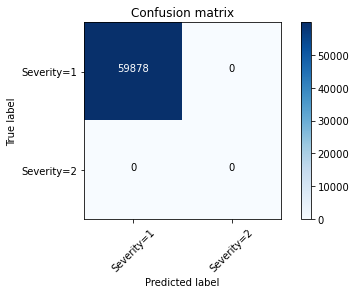

In [40]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Severity=1','Severity=2'],normalize= False,  title='Confusion matrix')

In [41]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.68      1.00      0.81     59878
           2       0.00      0.00      0.00     28801

   micro avg       0.68      0.68      0.68     88679
   macro avg       0.34      0.50      0.40     88679
weighted avg       0.46      0.68      0.54     88679



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6301050346676103